In [3]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/NLP/Corona_NLP_test.csv", encoding="latin-1")

In [6]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [7]:
print("Numbers of rows: {}".format(data.shape[0]))

Numbers of rows: 3798


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [9]:
data["Location"].value_counts(ascending = False)

,count
Location,
United States,75
"London, England",48
"Washington, DC",38
"New York, NY",34
"Los Angeles, CA",33
...,...
somewhere Around u. ATD,1
"Sabah, Malaysia ??",1
"Big Pine Key, FL",1


In [10]:
data["Sentiment"].value_counts(ascending=False)

,count
Sentiment,
Negative,1041
Positive,947
Neutral,619
Extremely Positive,599
Extremely Negative,592


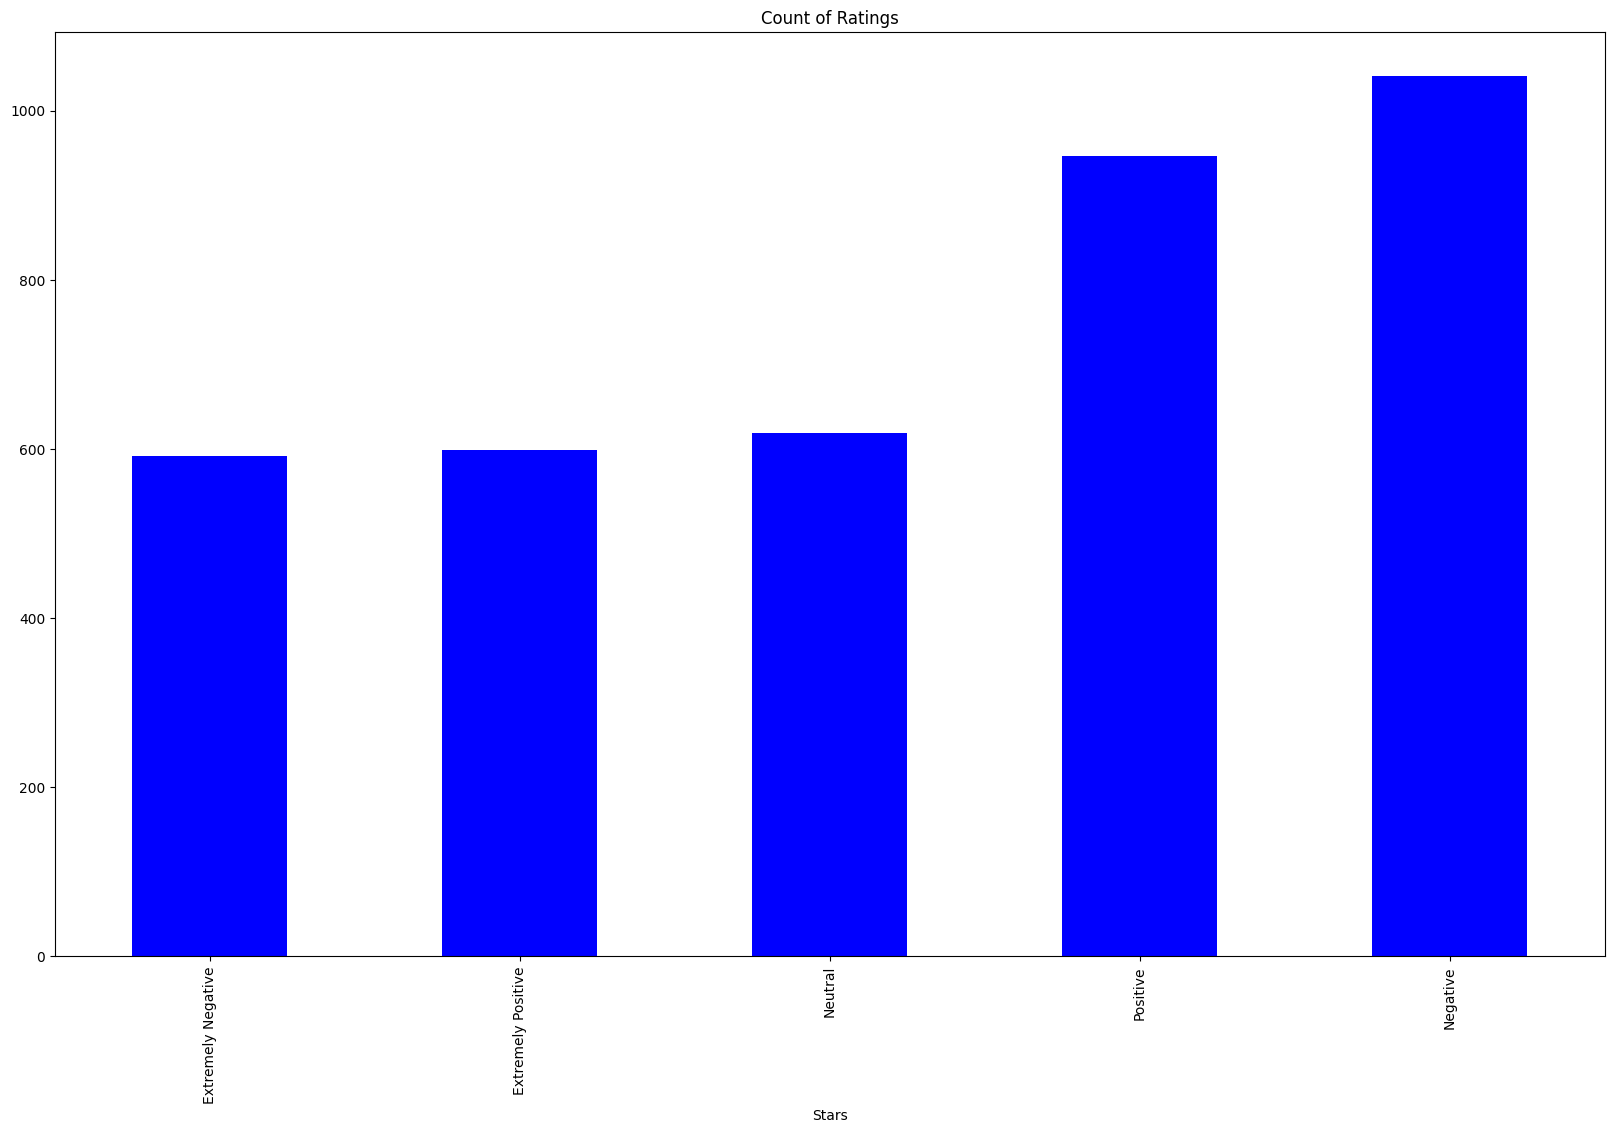

In [11]:
import matplotlib.pyplot as plt
data["Sentiment"].value_counts(ascending=True).plot(kind="bar", title="Count of Ratings", figsize=(20,12), color="Blue", xlabel="Stars")
plt.show()

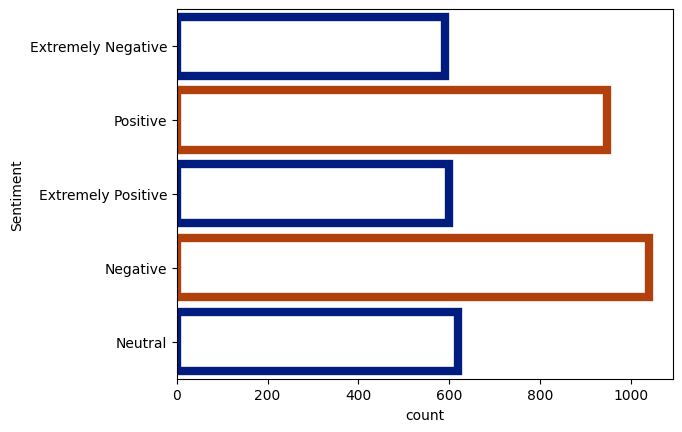

In [12]:
import seaborn as sns
sns.countplot(y= "Sentiment", data=data, facecolor=(1,1,1,1), linewidth=6, edgecolor=sns.color_palette("dark",2))
plt.show()

In [13]:
data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [14]:
data.drop(data.columns[[0,1,2,3]], axis=1, inplace=True)

In [15]:
data.head()

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [16]:
data.isnull().sum()

,0
OriginalTweet,0
Sentiment,0


In [17]:
data.duplicated().sum()

np.int64(0)

In [18]:
blanks = []
for index in data["OriginalTweet"]:
  if index.isspace()==True:
    blanks.append(index)

In [19]:
print(blanks)

[]


In [20]:
x = data["OriginalTweet"]
y = data["Sentiment"]

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33)

In [22]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
textclf = Pipeline([("tfidf",TfidfVectorizer()),("clf", LinearSVC())])

In [24]:
textclf.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
preds = textclf.predict(x_test)

In [26]:
print(accuracy_score(y_test, preds))

0.4154704944178628


In [27]:
cm = confusion_matrix(y_test, preds)
print(cm)

[[ 92   5  69   7  20]
 [ 11  93  19   6  61]
 [ 68  16 141  29  87]
 [  4  11  61  93  43]
 [ 25  62  94  35 102]]


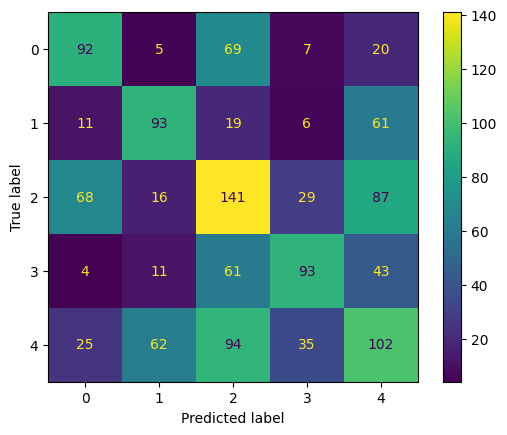

In [28]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

In [29]:
newtweet = [("I am really happy")]

In [30]:
textclf.predict(newtweet)

array(['Positive'], dtype=object)